In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import h5py


In [11]:
# Load HDF5 dataset
with h5py.File('datasets/train_signs.h5', 'r') as train_data:
    x_train = np.array(train_data['train_set_x'][:]) / 255.0  # Normalize
    y_train = np.array(train_data['train_set_y'][:])

with h5py.File('datasets/test_signs.h5', 'r') as test_data:
    x_test = np.array(test_data['test_set_x'][:]) / 255.0
    y_test = np.array(test_data['test_set_y'][:])

# One-hot encode the labels
y_train = to_categorical(y_train,num_classes=6)
y_test = to_categorical(y_test,num_classes=6)

print("Training set: ",x_train.shape,y_train.shape)
print("Test set: ",x_test.shape,y_test.shape)


Training set:  (1080, 64, 64, 3) (1080, 6)
Test set:  (120, 64, 64, 3) (120, 6)


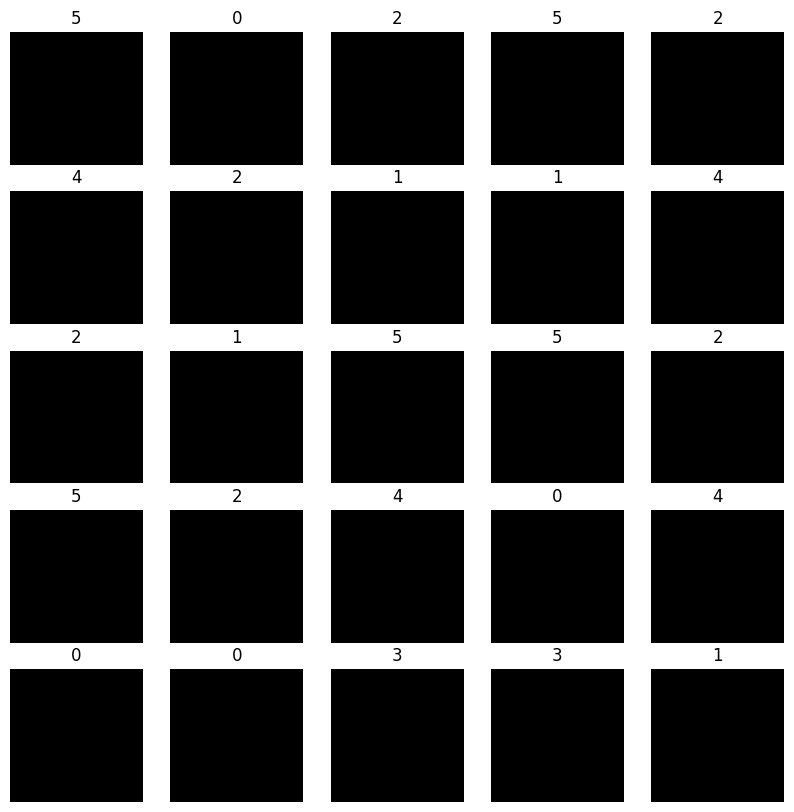

In [13]:
images_iter = iter(x_train)
labels_iter = iter(y_train)
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    # Remove .numpy() since x_train is already a numpy array
    plt.imshow(next(images_iter).astype("uint8"))
    # For one-hot encoded labels, we need to get the class index
    plt.title(np.argmax(next(labels_iter)))
    plt.axis("off")
plt.show()

In [16]:
model = models.Sequential([
    layers.Flatten(input_shape=(64,64,3)),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=6,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,638 (6.03 MB)

 Trainable params: 1,581,638 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train, 
    epochs=30,  # Set higher, early stopping will stop when needed
    batch_size=64, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6383 - loss: 0.9871 - val_accuracy: 0.5750 - val_loss: 1.1459
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6383 - loss: 0.9871 - val_accuracy: 0.5750 - val_loss: 1.1459
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6547 - loss: 1.0050 - val_accuracy: 0.5667 - val_loss: 0.9897
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6547 - loss: 1.0050 - val_accuracy: 0.5667 - val_loss: 0.9897
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6919 - loss: 0.9266 - val_accuracy: 0.6750 - val_loss: 0.9406
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6919 - loss: 0.9266 - val_accuracy: 0.6750 - val_loss: 0.9406
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7277 - loss: 0.8418 - val_accuracy: 0.6500 - val_loss: 0.9192
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7277 - loss: 0.8418 - val_accuracy: 0.6500 - v

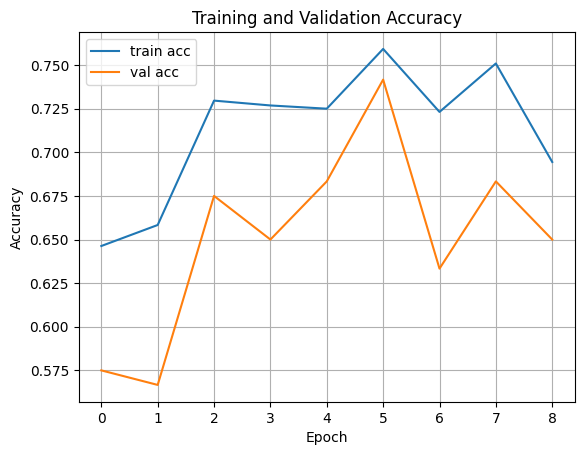

In [21]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy')
plt.show()

In [24]:
test_loss,test_acc = model.evaluate(x_test,y_test)

# Get final training accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7269 - loss: 0.8912 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7269 - loss: 0.8912 
Final training accuracy: 0.6944
Final validation accuracy: 0.6500
Test accuracy: 0.7417
Final training accuracy: 0.6944
Final validation accuracy: 0.6500
Test accuracy: 0.7417
